In [76]:
import numpy as np
from queue import PriorityQueue
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

#matrice de similarité
sim_mat = np.array ([[ 10, 6, 0, 0, 0, 0, 0, 0, 0 ],
[ 6, 10, 0, 0, 0, 0, 0, 0, 0 ],
[ 0, 0, 10, 5, 3, 3, 1, 1, 0 ],
[ 0, 0, 5, 10, 1, 2, 1, 1, 0 ],
[ 0, 0, 3, 1, 10, 4, 1, 2, 0 ],
[ 0, 0, 3, 2, 4, 10, 1, 4, 0 ],
[ 0, 0, 1, 1, 1, 1, 10, 1, 0 ],
[ 0, 0, 1, 1, 2, 4, 1, 10, 0 ],
[ 0, 0, 0, 0, 0, 0, 0, 0, 10 ]])


In [77]:
# implémentation de l'algorithme de clustering hiérarchique agglomératif
def clustering_hierarchique_agglomeratif(sim_mat):
    
    # Taille de la matrice de similarité
    N = sim_mat.shape[0]
    
    # initialisation de la liste des classes actives
    I = [1 for i in range(N)]
    
    # initialisation des files de priorité
    P = []
    for i in range(N):
        P.append(PriorityQueue())
    
    # pour i ∈ {1, . . . , N} faire
    for i in range(N):
        P.append(PriorityQueue())
        for j in range(N):
            if i != j:
                P[i].put((-sim_mat[i][j], j))
    
    # initialisation du dendrogramme
    dendrogramme = []
    
    # Construction du dendrogramme
    # pour chaque itération k ∈ {1, . . . , N − 1} faire
    for k in range(N - 1):
        # a = argmax P[i].MAX.sim ; avec i ∈ {1, . . . , N} et I[i] = 1 ;
        a = 0
        max_sim = -1
        for i in range(N): # on cherche la classe i la plus proche de la classe a
            if I[i] == 1 and P[i].queue[0][0] > max_sim: # si la classe i est active et si la classe i est plus proche de la classe a que la classe a ne l'est d'elle-même
                max_sim = P[i].queue[0][0]
                a = i
        
        # b = P[a].MAX.index ;
        b = P[a].queue[0][1]
        
        # Ajout de (a, b) à l’ensemble des fusions
        dendrogramme.append([a, b])
        
        # I[b] = 0 ;
        I[b] = 0
        
        # supprimer S[a][b] de P[a] ;
        P[a].get()
        
        # pour i tel que I[i] = 1 et i != a faire
        for i in range(N):
            if I[i] == 1 and i != a:
                
                # si S[i][a] ∈ P[i] alors
                if P[i].not_empty and P[i].queue[0][1] == a:
                    # supprimer S[i][a] de P[i] ;
                    P[i].get()
                if P[i].not_empty and P[a].queue[0][1] == i:
                    # supprimer S[a][i] de P[a] ;
                    P[a].get()
                
                if P[i].not_empty and P[i].queue[0][1] == b:
                    # supprimer S[i][b] de P[i] ;
                    P[i].get()
                
                # S[i][a] ← max{S[i][a], S[i][b]} ; # Méthode du lien unique
                sim = max(sim_mat[i][a], sim_mat[i][b])
                
                # S[a][i] ← max{S[i][a], S[i][b]} ;
                sim = max(sim_mat[i][a], sim_mat[i][b])
                
                # insérer (avec tri) S[i][a] dans P[i] et S[a][i] dans P[a] ;
                P[i].put((-sim, a))
                P[a].put((-sim, i))
                
    return dendrogramme

In [78]:
# test de l'algorithme de clustering hiérarchique agglomératif
dendrogramme = clustering_hierarchique_agglomeratif(sim_mat)
print(dendrogramme)

[[8, 0], [0, 1], [8, 0], [8, 2], [0, 2], [0, 3], [0, 5], [0, 4]]


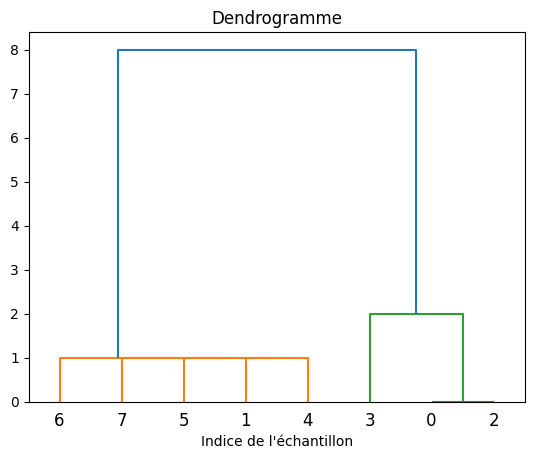

In [79]:
# Convertir votre dendrogramme en une matrice de lien
linkage_matrix = linkage(dendrogramme, 'single')

# Afficher le dendrogramme
dendrogram(linkage_matrix, orientation='top')
plt.title('Dendrogramme')
plt.xlabel('Indice de l\'échantillon')
plt.show()